# Quantum Computing Workshop: Introduction to Qiskit

##### Basado en Notebook de Sean Wagner

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator
import warnings
warnings.filterwarnings('ignore')

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-05-09 14:37:46,938: Default instance: ibm-q-asu/internal/reservations


In [2]:
# Other useful imports

import numpy as np

# Basic NOT circuit

Goal: flip a qubit from the initial $|0\rangle$ state to the $|1\rangle$ state

Note that qubits on IBM systems are always reset to the $|0\rangle$ state at the start of the circuit.

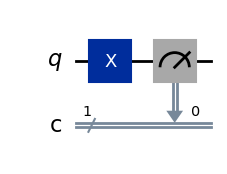

In [3]:
# Basic quantum circuit
circ = QuantumCircuit(1,1)
circ.x(0)
circ.measure(0,0)
circ.draw(output='mpl')

In [4]:
# Create a backend for local execution in a simulator
sim_backend = AerSimulator()

In [5]:
# Run basic circuit and measure
job = sim_backend.run(circ, shots=2048)
result = job.result()
counts = result.get_counts()

counts

{'1': 2048}

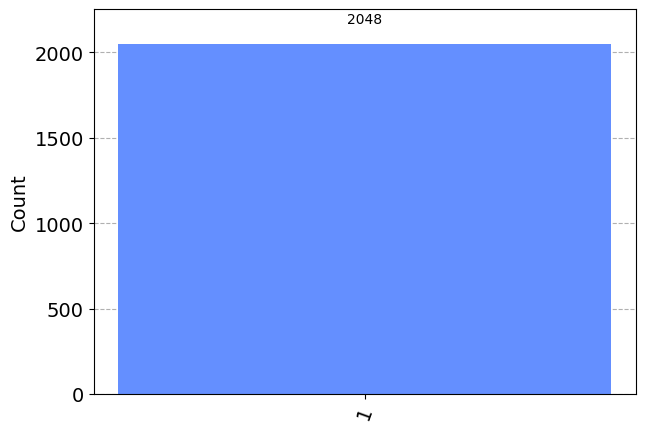

In [6]:
# Plot histogram of results
plot_histogram(counts)

# CNOT circuit

Goal: flip the state of a target qubit based on the state of another control qubit

Nota: Recuerda que el qubit de control, es aquel donde ubicamos el circulo de menor tamaño.

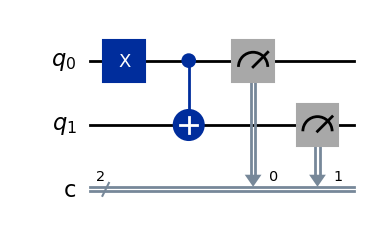

In [7]:
# Create CNOT circuit
cnot_circ = QuantumCircuit(2,2)

# Comment out the next line to see what happens when the input is left as |0>
cnot_circ.x(0)

# Comment out the next line to see what happens when the target is left as |0>
#cnot_circ.x(1)

# Apply CNOT, then measure
cnot_circ.cx(0,1)
cnot_circ.measure([0,1],[0,1])

cnot_circ.draw()

In [8]:
# Run CNOT circuit
job = sim_backend.run(cnot_circ)
counts = job.result().get_counts()
counts

{'11': 1024}

### Nota: Recuerda que el qubit menos significativo se encuentra del lado izquierdo de la lectura en llaves {qn .. q2 q1 q0}

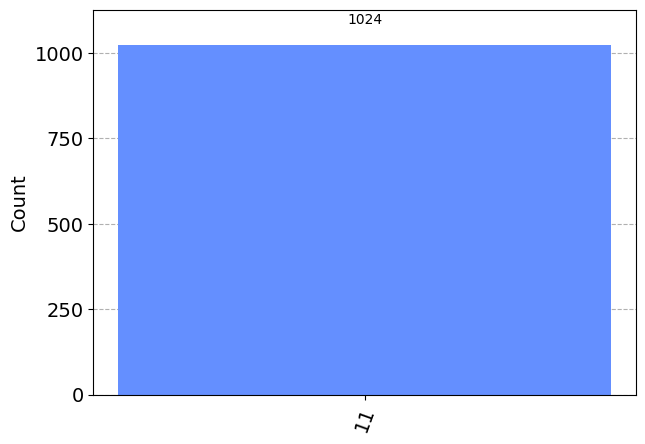

In [9]:
# Plot histogram of results
plot_histogram(counts)

# Superposition

Goal: place a qubit into an even superposition of $|0\rangle$ and $|1\rangle$

_Refresh_: Superposición es una característica cuántica que permite que dos estados (ej. |1> o |0>) puedan ser obtenidos al mismo tiempo. La Compuerta Hadamard (H) nos permite super poner los dos estados posibles de un qubit.

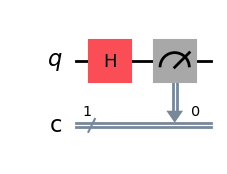

In [10]:
# Create superposition circuit by using the Hadamard gate
sp_circ = QuantumCircuit(1,1)
sp_circ.h(0)
sp_circ.measure(0,0)
sp_circ.draw()

In [13]:
# Run simulation and plot results
job = sim_backend.run(sp_circ)
sp_counts = job.result().get_counts()
sp_counts

{'1': 521, '0': 503}

### Visualización del enfoque estadístico de los experimentos 

Ejecuta el mismo experimento pero con un shot. Ejecuta el circuito varias veces manualmente. Observa el resultado.

In [14]:
# Ejecuta este varias veces
job = sim_backend.run(sp_circ, shots=1)
sp_counts = job.result().get_counts()
sp_counts

{'0': 1}

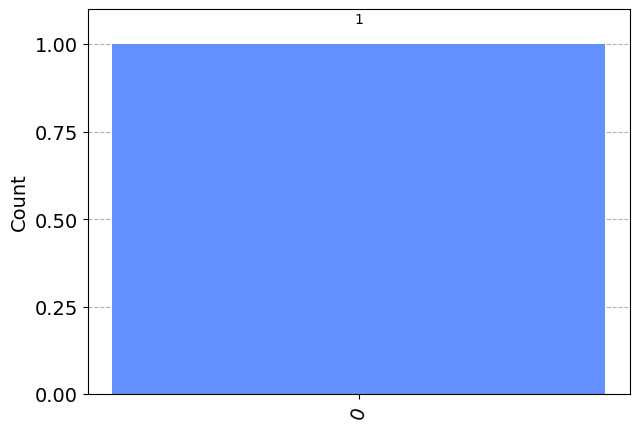

In [15]:
# Plot
plot_histogram(sp_counts)

### Multiple qubits in superposition

En este ejercicio mediremos varios qubits en un estado superpuesto usando compuertas Hadamard.

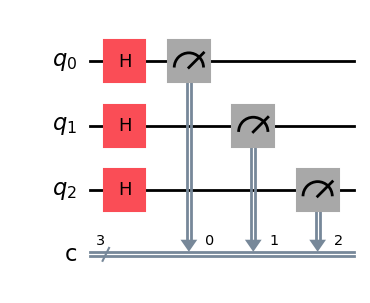

In [16]:
# Create superposition circuit
sp_circ2 = QuantumCircuit(3,3)
sp_circ2.h([0,1,2])
sp_circ2.measure([0,1,2],[0,1,2])
sp_circ2.draw()

In [17]:
# Run simulation and plot results
# Try increasing the number of shots to see how that affects the result
job = sim_backend.run(sp_circ2, shots=10*100)
sp_counts = job.result().get_counts()
sp_counts

{'100': 123,
 '111': 130,
 '011': 127,
 '000': 120,
 '010': 132,
 '110': 129,
 '001': 113,
 '101': 126}

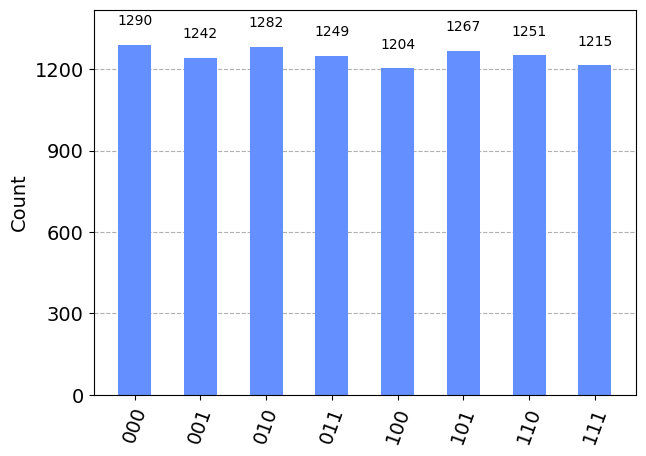

In [18]:
# Run simulation and plot results
# Try increasing the number of shots to see how that affects the result
job = sim_backend.run(sp_circ2, shots=10*1000)
sp_counts = job.result().get_counts()
plot_histogram(sp_counts)

# Bell state (entrelazamiento)
- Bell state para el caso de dos qubits (entrelazados), cuando medimos uno de ellos y conocemos su estado, podemos inferir el estado del otro qubit.
- En otras palabras, es un estado donde no importa dónde se ubique un qubit, el otro "lo seguirá" con un estado predecible.
- Este tipo de estados ayuda a describir otros estados de un sistema cuántico más complejo.
- Hay cuatro tipo de Bell states.

Goal: Create the $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ entangled state

Nota, recuerda de para la notación de dirac |00>, el bit menos significativo es el de la derecha.

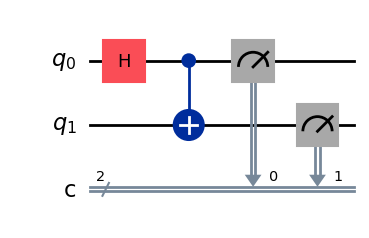

In [19]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw()

In [20]:
job = sim_backend.run(bell_circ)
bell_counts = job.result().get_counts()
bell_counts

{'11': 511, '00': 513}

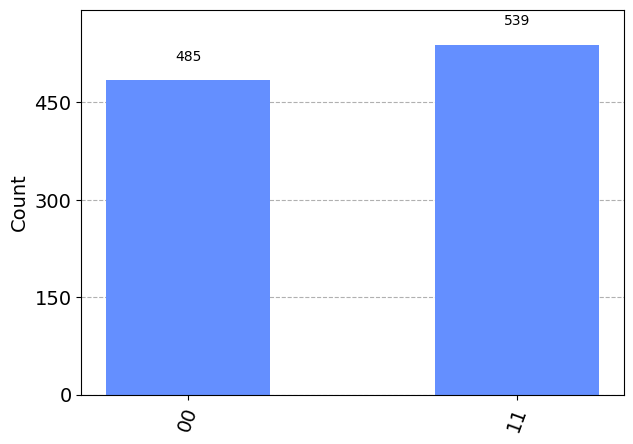

In [22]:
plot_histogram(bell_counts)

# Corriendo tu código en una computadora cuántica real

In [26]:
service.instances()

['ibm-q-asu/internal/reservations',
 'ibm-q-asu/main/tec-german',
 'ibm-q/open/main']

In [24]:
# Import the IBMProvider to run directly on the IBM quantum processors and cloud simulators

from qiskit_ibm_provider import IBMProvider

# provider = IBMProvider(instance='ibm-q/open/main')
provider = IBMProvider(instance='ibm-q-asu/main/tec-german')

In [25]:
# Get backend
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_sherbrooke')>]

In [27]:
# Find the least busy system that has at least 2 qubits...
from qiskit_ibm_provider import least_busy

ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                   not x.configuration().simulator and x.status().operational==True))

print(ibmq_backend)

<IBMBackend('ibm_torino')>


In [38]:
# ...Or simply select a specific backend
#ibmq_backend = provider.get_backend('ibm_kyoto')
ibmq_backend

<IBMBackend('ibm_torino')>

In [29]:
# Run the circuit or DONT !!!! considera que la ejecucion de un circuito in el tier gratuito pueda tomar mucho tiempo

# job_ibmq = ibmq_backend.run(bell_circ, shots=1024)

In [39]:
# Consulta el estado del Job or DONT !!!!
job_ibmq.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
# Consulta más detalles del Job
job_ibmq.queue_info()

In [ ]:
# Get the results (NOTE: this will error out since we did not transpile first!)

result = job_ibmq.result()

#### El error generado significa que la compuerta utilizada en el circuito no está soportada en el sistema. Para alcanzarlo necesito hacer una transpilación.

### Qué es Transpilado? (Transpiling):
    - Es una representación de un circuito equivalente (trasformado) al que quieres correr para usarlo de acuerdo al sistema objetivo.
    - Ej, en Eagle tenemos 4 circuitos + 1 de medición.

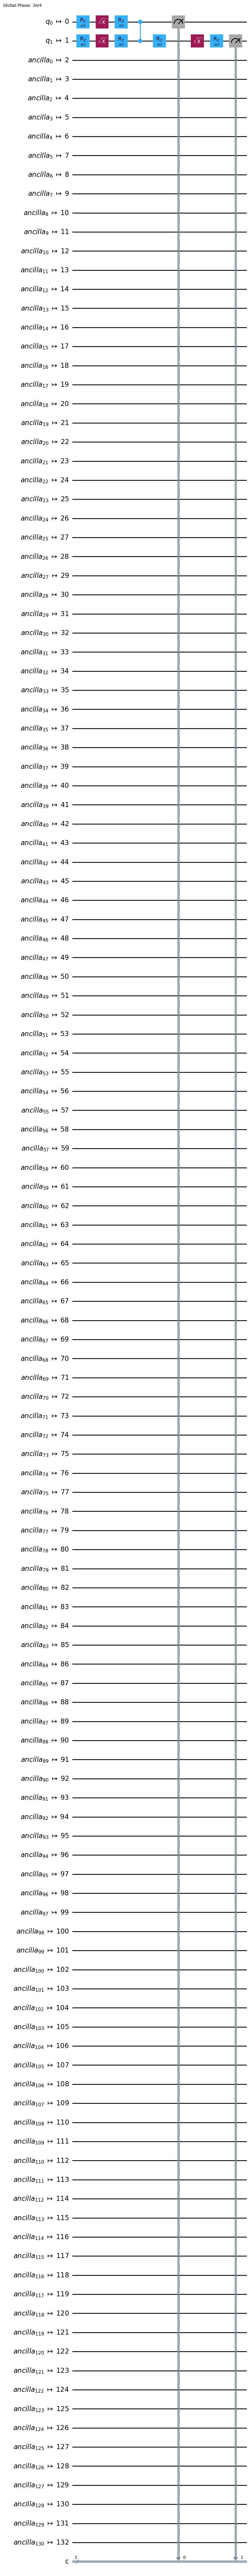

In [33]:
# Transpile the circuit first, the attempt to run again!
from qiskit import transpile

bell_circ_tp = transpile(bell_circ, ibmq_backend)
bell_circ_tp.draw()

In [34]:
# Run the circuit again
job_ibmq = ibmq_backend.run(bell_circ_tp, shots=1024)

# OR...

In [35]:
# Consulta más detalles del Job
job_ibmq.queue_info()

<QueueInfo(job_id='None', _status='unknown', estimated_start_time='2024-05-09T19:47:47.489000+00:00', estimated_complete_time='2024-05-09T20:25:02.489000+00:00', position=1, hub_priority=None, group_priority=None, project_priority=None)>

In [ ]:
from qiskit.providers.jobstatus import JobStatus

# Corre el circuito de nuevo pero ya transpilado
job_ibmq = ibmq_backend.run(bell_circ_tp, shots=1024)
 
try:
    job_result = job.result()  # It will block until the job finishes.
    print("The job finished with result {}".format(job_result))
except JobError as ex:
    print("Something wrong happened!: {}".format(ex))

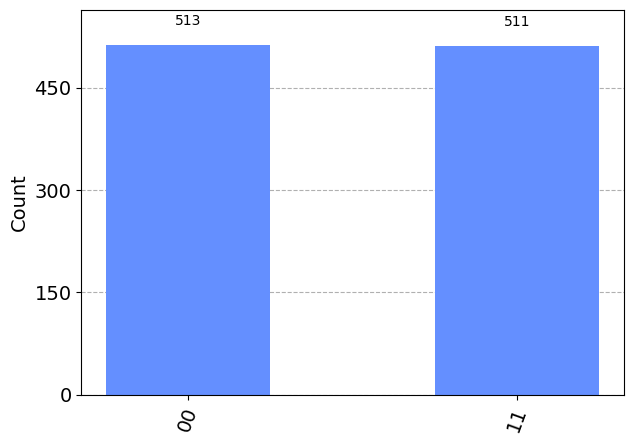

In [37]:
# Plot histogram of results. Note the noise in the system
# results in states that should not appear in the measurements.
counts = job_result.get_counts()
plot_histogram(counts)